In [1]:
from torch.optim import Adam

import render
import regularization
import transformation
from show import show_result_html

IMAGE_SIZE    = 64
DEVICE        = 'cpu'
LEARNING_RATE = 0.05

100%|██████████| 2560/2560 [00:36<00:00, 69.77it/s, loss=-14.2559]



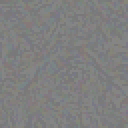
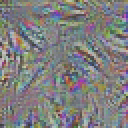
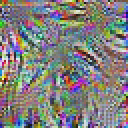
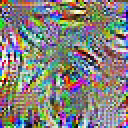
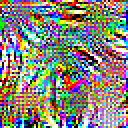
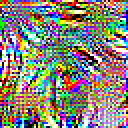

In [7]:
image = render.ParameterizedImage(IMAGE_SIZE, sd=0.01).to(DEVICE)
optimizer = Adam(image.parameters(), lr=LEARNING_RATE)

images, thresholds = render.render_vis("inception4b:branch4:10",
                                       optimizer,
                                       image,
                                       device=DEVICE)

show_result_html(images, thresholds)

100%|██████████| 2560/2560 [00:43<00:00, 58.47it/s, loss=-10.6825]



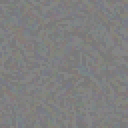
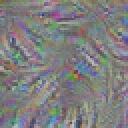
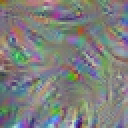
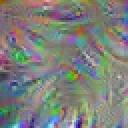
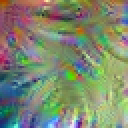
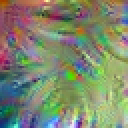

In [8]:
L1_weight   = 0.05
TV_weight   = 0.25
Blur_weight = 0.1

image = render.ParameterizedImage(IMAGE_SIZE, sd=0.01).to(DEVICE)
optimizer = Adam(image.parameters(), lr=LEARNING_RATE)

regularizers = [
    regularization.add_regularizer(L1_weight, regularization.l1_reg),
    regularization.add_regularizer(TV_weight, regularization.total_variation),
    regularization.add_regularizer(Blur_weight, regularization.blur_reg),
]

images, thresholds = render.render_vis("inception4b:branch4:10",
                                       optimizer,
                                       image,
                                       regularizers,
                                       device=DEVICE)
show_result_html(images, thresholds)

100%|██████████| 2560/2560 [00:39<00:00, 65.02it/s, loss=-8.9007] 



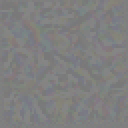
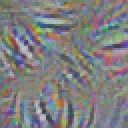
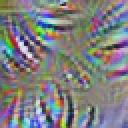
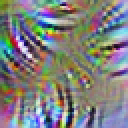
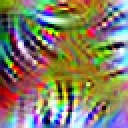
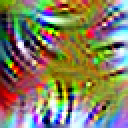

In [6]:
L1_weight   = 0.05
TV_weight   = 0.2
Blur_weight = 0.01

JITTER = 1
ROTATE = 5
SCALE  = 1.1

image = render.ParameterizedImage(IMAGE_SIZE, sd=0.01).to(DEVICE)
optimizer = Adam(image.parameters(), lr=LEARNING_RATE)

regularizers = [
    regularization.add_regularizer(L1_weight, regularization.l1_reg),
    regularization.add_regularizer(TV_weight, regularization.total_variation),
    regularization.add_regularizer(Blur_weight, regularization.blur_reg),
]

transformations = transformation.TransformationRobustness(
    [
        transformation.pad_image(),
        transformation.jitter(JITTER*2),
        transformation.random_scale([SCALE ** (n/10.) for n in range(-10, 11)]),
        transformation.random_rotate(range(-ROTATE, ROTATE+1)),
        transformation.jitter(JITTER),
        transformation.crop_padding()
    ]
).to(DEVICE)

# obtain ready-to-display feature visualizations
images, thresholds = render.render_vis("inception4b:branch4:10",
                                       optimizer, 
                                       image,
                                       regularizers=regularizers,
                                       transformations=transformations,
                                       device=DEVICE)
show_result_html(images, thresholds)